In [1]:
import sys
import os

from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import misc
from scipy.spatial import distance
import imageio

%matplotlib inline

Using TensorFlow backend.


In [2]:
sys.path.append('/home/albert/keras-frcnn/')
import frcnn

sys.path.append('/home/albert/github/tensorflow/')
import triplet

{0: 'dog', 1: 'car', 2: 'pottedplant', 3: 'bird', 4: 'train', 5: 'sheep', 6: 'person', 7: 'tvmonitor', 8: 'bottle', 9: 'chair', 10: 'cat', 11: 'bus', 12: 'cow', 13: 'diningtable', 14: 'sofa', 15: 'horse', 16: 'motorbike', 17: 'bicycle', 18: 'boat', 19: 'aeroplane', 20: 'bg'}
Loading weights from /home/albert/keras-frcnn/model_frcnn.hdf5


In [3]:
model = load_model('/home/albert/github/tensorflow/models/densenet_triplet_margin_3/densenet_triplet_margin_3_5000.h5',
                   custom_objects={'triplet_loss' : triplet.triplet_loss})

In [89]:
query_img = misc.imread('/home/albert/github/pose_id/query4.png')
query_img = query_img[:, :, :3]
query_emb = model.predict(query_img.reshape(1,128,64,3))[0]

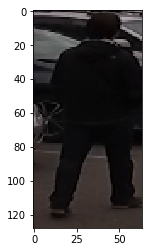

In [90]:
plt.imshow(query_img)

In [91]:
writer = imageio.get_writer('/home/albert/github/pose_id/DJI_query4.mp4', fps=5)

all_dist = []

for f_n in range(0,750,5):
    file_name = '/home/albert/github/pose_id/DJI_seq/' + ('DJI_0005_%d.png' % f_n)
    frame = misc.imread(file_name)
    all_dets, img_rendered = frcnn.run_frcnn(file_name)
    person_dets = []
    pred_embs = []
    
    for det in all_dets:
        if det[0] == 'person':
            frame = cv2.rectangle(frame, (det[1],det[2]), (det[3],det[4]), (0,255,0), 3)
            person_dets.append(det)
            img_det = cv2.resize(frame[det[2]:det[4], det[1]:det[3]], (64,128))
            pred_embs.append(model.predict(img_det.reshape(1,128,64,3)).tolist())
    
    pred_dist = [np.abs(distance.cosine(np.array(predict), query_emb)) for predict in pred_embs]
    all_dist.append(pred_dist)
    
    if len(pred_dist) > 0:
        closest_det = person_dets[np.array(pred_dist).argmin()]
        thresh = 0.1
        if np.array(pred_dist).min() < thresh:
            frame = cv2.rectangle(frame, (closest_det[1],closest_det[2]), 
                                  (closest_det[3],closest_det[4]), (225,0,0), 3)
        else:
            frame = cv2.rectangle(frame, (closest_det[1],closest_det[2]), 
                                  (closest_det[3],closest_det[4]), (0,0,255), 3)
    
    writer.append_data(frame)

writer.close()

/home/albert/github/pose_id/DJI_seq/DJI_0005_0.png
Elapsed time = 0.84504699707
/home/albert/github/pose_id/DJI_seq/DJI_0005_5.png
Elapsed time = 0.786503076553
/home/albert/github/pose_id/DJI_seq/DJI_0005_10.png
Elapsed time = 0.784174919128
/home/albert/github/pose_id/DJI_seq/DJI_0005_15.png
Elapsed time = 0.824110031128
/home/albert/github/pose_id/DJI_seq/DJI_0005_20.png
Elapsed time = 0.791937828064
/home/albert/github/pose_id/DJI_seq/DJI_0005_25.png
Elapsed time = 0.781420946121
/home/albert/github/pose_id/DJI_seq/DJI_0005_30.png
Elapsed time = 0.780126810074
/home/albert/github/pose_id/DJI_seq/DJI_0005_35.png
Elapsed time = 0.787014961243
/home/albert/github/pose_id/DJI_seq/DJI_0005_40.png
Elapsed time = 0.797363996506
/home/albert/github/pose_id/DJI_seq/DJI_0005_45.png
Elapsed time = 0.799312114716
/home/albert/github/pose_id/DJI_seq/DJI_0005_50.png
Elapsed time = 0.788387060165
/home/albert/github/pose_id/DJI_seq/DJI_0005_55.png
Elapsed time = 0.784162998199
/home/albert/github

Elapsed time = 0.795030117035
/home/albert/github/pose_id/DJI_seq/DJI_0005_500.png
Elapsed time = 0.793698072433
/home/albert/github/pose_id/DJI_seq/DJI_0005_505.png
Elapsed time = 0.778136014938
/home/albert/github/pose_id/DJI_seq/DJI_0005_510.png
Elapsed time = 0.801984071732
/home/albert/github/pose_id/DJI_seq/DJI_0005_515.png
Elapsed time = 0.785796165466
/home/albert/github/pose_id/DJI_seq/DJI_0005_520.png
Elapsed time = 0.790181875229
/home/albert/github/pose_id/DJI_seq/DJI_0005_525.png
Elapsed time = 0.793334960938
/home/albert/github/pose_id/DJI_seq/DJI_0005_530.png
Elapsed time = 0.80576300621
/home/albert/github/pose_id/DJI_seq/DJI_0005_535.png
Elapsed time = 0.793558120728
/home/albert/github/pose_id/DJI_seq/DJI_0005_540.png
Elapsed time = 0.797801017761
/home/albert/github/pose_id/DJI_seq/DJI_0005_545.png
Elapsed time = 0.790136098862
/home/albert/github/pose_id/DJI_seq/DJI_0005_550.png
Elapsed time = 0.79225897789
/home/albert/github/pose_id/DJI_seq/DJI_0005_555.png
Elapse

### Generate Query Image

/home/albert/github/pose_id/DJI_seq/DJI_0005_675.png
Elapsed time = 0.80735707283


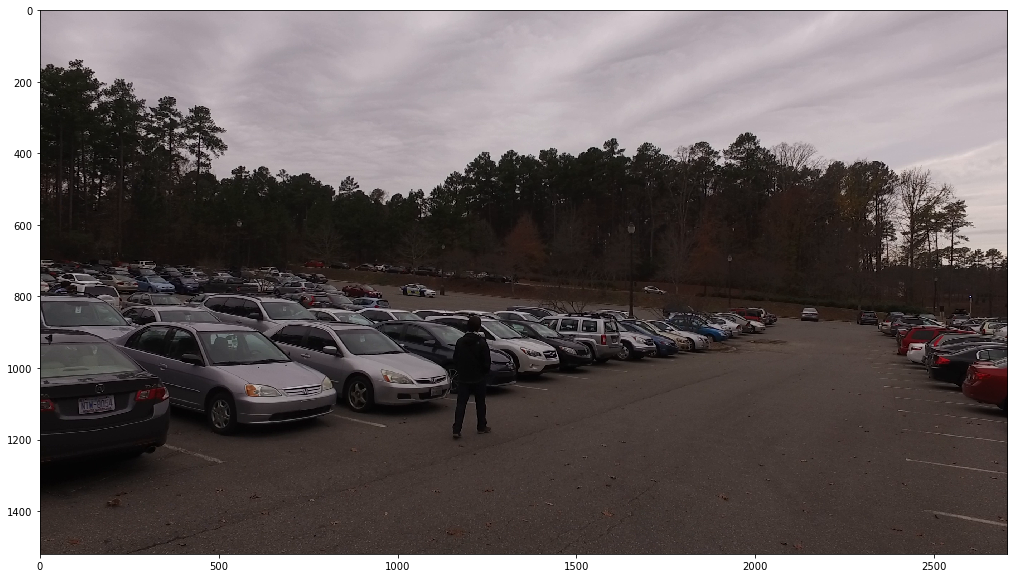

In [86]:
file_name = '/home/albert/github/pose_id/DJI_seq/' + ('DJI_0005_%d.png' % 675)
frame = misc.imread(file_name)
all_dets, img_rendered = frcnn.run_frcnn(file_name)

for det in all_dets:
    if det[0] == 'person':
#         frame = cv2.rectangle(frame, (det[1],det[2]), (det[3],det[4]), (0,255,0), 3)
        person_dets.append(det)
        img_det = cv2.resize(frame[det[2]:det[4], det[1]:det[3]], (64,128))
        pred_embs.append(model.predict(img_det.reshape(1,128,64,3)).tolist())

plt.figure(figsize=(20,10))
plt.imshow(frame)

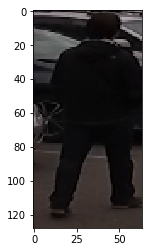

In [87]:
plt.imshow(img_det)

In [88]:
plt.imsave('/home/albert/github/pose_id/query4.png', cv2.resize(img_det, (64,128)))

### Analysis of Vector Representations with t-SNE

In [66]:
people = []
predictions = []

for f_n in range(0,750,10):
    file_name = '/home/albert/github/pose_id/DJI_seq/' + ('DJI_0005_%d.png' % f_n)
    frame = misc.imread(file_name)
    all_dets, img_rendered = frcnn.run_frcnn(file_name)
    
    for det in all_dets:
        if det[0] == 'person':
            img_det = cv2.resize(frame[det[2]:det[4], det[1]:det[3]], (64,128))
            people.append(img_det.tolist())
            predictions.append(model.predict(img_det.reshape(1,128,64,3)).tolist())

/home/albert/github/pose_id/DJI_seq/DJI_0005_0.png
Elapsed time = 0.832406044006
/home/albert/github/pose_id/DJI_seq/DJI_0005_10.png
Elapsed time = 0.814536094666
/home/albert/github/pose_id/DJI_seq/DJI_0005_20.png
Elapsed time = 0.820411920547
/home/albert/github/pose_id/DJI_seq/DJI_0005_30.png
Elapsed time = 0.806767940521
/home/albert/github/pose_id/DJI_seq/DJI_0005_40.png
Elapsed time = 0.788299798965
/home/albert/github/pose_id/DJI_seq/DJI_0005_50.png
Elapsed time = 0.840940952301
/home/albert/github/pose_id/DJI_seq/DJI_0005_60.png
Elapsed time = 0.802472829819
/home/albert/github/pose_id/DJI_seq/DJI_0005_70.png
Elapsed time = 0.816558122635
/home/albert/github/pose_id/DJI_seq/DJI_0005_80.png
Elapsed time = 0.800547838211
/home/albert/github/pose_id/DJI_seq/DJI_0005_90.png
Elapsed time = 0.803034067154
/home/albert/github/pose_id/DJI_seq/DJI_0005_100.png
Elapsed time = 0.813232898712
/home/albert/github/pose_id/DJI_seq/DJI_0005_110.png
Elapsed time = 0.807050943375
/home/albert/gi

In [120]:
people = np.array(people, dtype=np.uint8)
predictions = np.array(predictions).squeeze()

In [121]:
print predictions.shape

(129, 128)


In [122]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [123]:
pca = PCA(n_components=50)
predictions_50d = pca.fit_transform(predictions)

In [124]:
tsne = TSNE(n_components=2)
predictions_reduced = tsne.fit_transform(predictions_50d) 

In [125]:
print predictions_reduced.flatten().min()

-8.42627


In [126]:
predictions_reduced *= 25

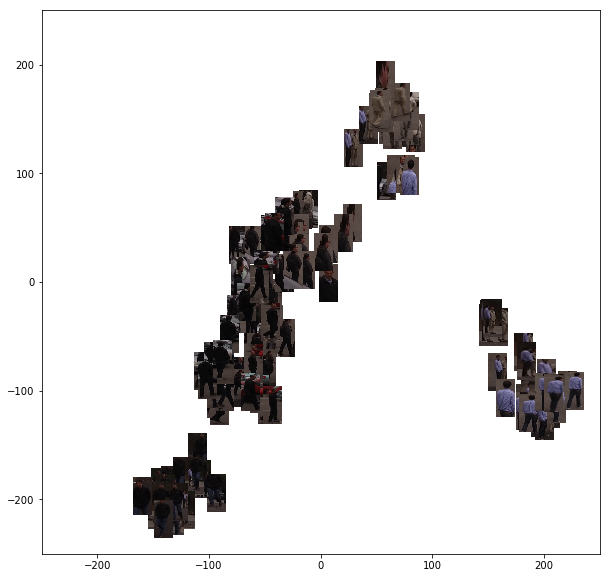

In [136]:
plt.figure(figsize=(10,10))
size = 250
x_min = y_min= -size
x_max = y_max = size

# With newer (1.0) versions of matplotlib, you can 
# use the "zorder" kwarg to make the image overlay
# the plot, rather than hide behind it... (e.g. zorder=10)
for p in range(len(people)):
    plt.figimage(cv2.resize(people[p], (0,0), fx=0.3, fy=0.3), 
                 int(predictions_reduced[p][0]) + abs(y_min), int(predictions_reduced[p][1]) + abs(y_min), zorder=1)
#     print predictions_reduced[p][0], predictions_reduced[p][1]
    
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()